In [60]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
conn = sqlite3.connect('../scraping/scraping_data.db')
cursor = conn.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()
print(*[table[0] for table in tables], sep='\n')

params_to_scrap
bronze_racing_tries
bronze_try_results


In [20]:
query = """select * from params_to_scrap limit 10"""
pd.read_sql_query(query, conn)

,id,circuit,year,month,day,race_type,fetched
0,1,granjaviana,2022,2,7,,1
1,2,granjaviana,2022,2,8,,1
2,3,granjaviana,2022,2,9,,1
3,4,granjaviana,2022,2,1,,1
4,5,granjaviana,2022,2,2,,1
5,6,granjaviana,2022,2,3,,1
6,7,granjaviana,2022,2,4,,1
7,8,granjaviana,2022,2,5,,1
8,9,granjaviana,2022,2,6,,1
9,10,granjaviana,2022,1,1,,1


In [19]:
query = """select * from bronze_racing_tries limit 10"""
pd.read_sql_query(query, conn)

,id,params_id,day,time,category,track,title,uid,fetched
0,1,1,07/02,23:30,Rental,CIRCUITO 101,PROVA 10 - 23:30,f9d17866d71d174cbed8a6f0d1ea40aa,1
1,2,1,07/02,23:00,Rental,CIRCUITO 101,PROVA 9 - 23:00,32f75d8987e9b97ba4bd92abbc1f2126,1
2,3,1,07/02,22:30,Rental,CIRCUITO 112,TORNEIO PANGARÉ NIGHT / PROVA 8 - 22:30,60b215cb3bd41e50cf5a46ae41958ae9,1
3,4,1,07/02,22:00,Rental,CIRCUITO 112,LESTE RACING - SUPER PRO / PROVA 7 - 22:00,a11c4ab646f583786f7571a385fbc33b,1
4,5,1,07/02,21:30,Rental,CIRCUITO 112,LESTE RACING - PRO / PROVA 6 - 21:30,3e8db3d23d7f2178d926e3d04358b230,1
5,6,1,07/02,21:00,Rental,CIRCUITO 112,LESTE RACING - LIGHT / PROVA 5 - 21:00,f672cf0470e0261f4155275ad1685dde,1
6,7,1,07/02,20:30,Rental,CIRCUITO 101,PROVA 4 - 20:30,c1516b95fa5da55543e3fea9e040dddc,1
7,8,1,07/02,20:00,Rental,CIRCUITO 101,EASY KART - TREINO / PROVA 3 - 20:00,783fb9fe93e354c6d626feff044b2d41,1
8,9,1,07/02,19:30,Rental,CIRCUITO 101,PROVA 2 - 19:30,c982e221016eeb64b5faffc42a8f847a,1
9,10,1,07/02,19:00,Rental,CIRCUITO 101,PROVA 1 - 19:00,f2eb18eff3b6fdc17fc63ec027792112,1


In [64]:
query = """select * from bronze_try_results limit 10"""
pd.read_sql_query(query, conn)

,id,uid,position,car_number,name,class,comment,laps,total_time,best_lap_time,total_gap,gap
0,1,f9d17866d71d174cbed8a6f0d1ea40aa,1,032,LOBI,RENTAL,,14,15:02.497,58.536,,
1,2,f9d17866d71d174cbed8a6f0d1ea40aa,2,023,SALIM,RENTAL,,14,15:12.708,58.739,10.211,10.211
2,3,f9d17866d71d174cbed8a6f0d1ea40aa,3,034,FABIO ZORZO,RENTAL,,14,15:25.506,58.750,23.009,12.798
3,4,f9d17866d71d174cbed8a6f0d1ea40aa,4,024,HUGO FREITAS,RENTAL,ADV,14,15:26.741,59.344,24.244,1.235
4,5,f9d17866d71d174cbed8a6f0d1ea40aa,5,047,JOHN JOHN,RENTAL,,14,15:26.865,59.985,24.368,0.124
5,6,f9d17866d71d174cbed8a6f0d1ea40aa,6,033,JUNINHO,RENTAL,,14,15:32.172,59.755,29.675,5.307
6,7,f9d17866d71d174cbed8a6f0d1ea40aa,7,011,JEAN LIMA,RENTAL,,14,15:33.149,1:00.108,30.652,0.977
7,8,f9d17866d71d174cbed8a6f0d1ea40aa,8,019,JEFF SEDE,RENTAL,,14,15:47.818,1:00.701,45.321,14.669
8,9,f9d17866d71d174cbed8a6f0d1ea40aa,9,048,RONI,RENTAL,,14,16:01.470,1:01.191,58.973,13.652
9,10,f9d17866d71d174cbed8a6f0d1ea40aa,10,003,JHONY,RENTAL,,14,16:05.107,1:00.377,1:02.610,3.637


In [62]:
query = """
select summary.*
from (select 
        pts.year,
        pts.month,
        btr.car_number,
        btr.position, 
        count(1) as qty
        from bronze_try_results btr
        left join bronze_racing_tries brt on btr.uid = brt.uid
        left join params_to_scrap pts on pts.id = brt.params_id
        group by 1,2,3,4) summary
left join (select 
            btr.car_number,
            count(1) as total_tries_qty
            from bronze_try_results btr
            group by 1) total_tries on total_tries.car_number = summary.car_number
where 
total_tries_qty >= 150*12*2
"""
df = pd.read_sql_query(query, conn)
df['tries_in_a_month'] = df.groupby(['year', 'month', 'car_number'])['qty'].transform('sum')
df['position_rep_in_a_month'] = df['qty']/df['tries_in_a_month']
df['date'] = pd.to_datetime(df[['year', 'month']].assign(DAY=1))
df = df[(df['position'] == '1') & (df['car_number'].isin(['001', '002']))].drop(columns=['position','tries_in_a_month', 'year', 'month'], axis=1)
df

,car_number,qty,position_rep_in_a_month,date
0,001,18,0.107784,2022-01-01
33,001,14,0.086957,2022-02-01
66,001,10,0.054348,2022-03-01
96,001,9,0.052023,2022-04-01
126,001,8,0.043011,2022-05-01
159,001,6,0.041379,2022-06-01
196,001,7,0.037037,2022-07-01
229,001,9,0.057325,2022-08-01
258,001,5,0.028090,2022-09-01
295,001,14,0.084848,2022-10-01


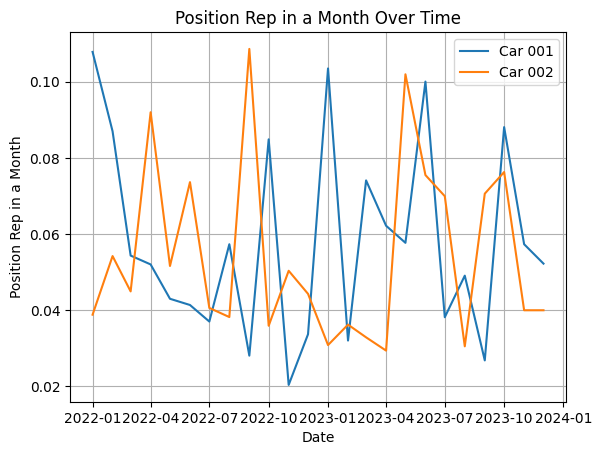

In [63]:
# Plot a line chart for each 'car_number'
for car_number, group in df.groupby('car_number'):
    plt.plot(group['date'], group['position_rep_in_a_month'], label=f'Car {car_number}')

# Customize the plot
plt.xlabel('Date')
plt.ylabel('Position Rep in a Month')
plt.title('Position Rep in a Month Over Time')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()